## Observations and Insights 

In [1]:
#some of the codes were given to us by professor
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combine = pd.merge(mouse_metadata, study_results , on="Mouse ID")
# Display the data table for preview
Combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
Summary_Statistics = pd.DataFrame(Combine.groupby("Drug Regimen").count())

mean = Combine.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median = Combine.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = Combine.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = Combine.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = Combine.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

Summary = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Var": variance,
    "STD": std,
    "SEM": sem,
})
Summary.head()


,Mean,Median,Var,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Total_Mice = Combine.groupby(["Drug Regimen"]).count()["Mouse ID"]


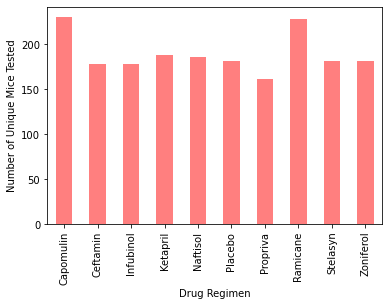

In [9]:
Bar = Total_Mice.plot.bar(color='r', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")


Total_Mice;

In [10]:
x_axis = np.arange(len(Total_Mice))

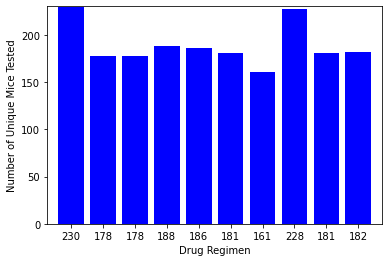

In [11]:
plt.bar(x_axis, Total_Mice, color="b", align="center");
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Total_Mice)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Total_Mice)+0.4)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.show()

<IPython.core.display.Javascript object>


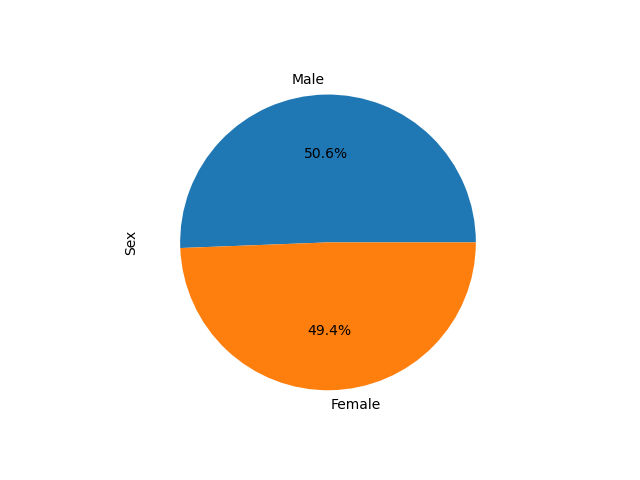

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
%matplotlib notebook
MvsF = Combine.Sex.value_counts()
MvsF.plot(kind="pie",autopct='%1.1f%%')
plt.show()

<IPython.core.display.Javascript object>


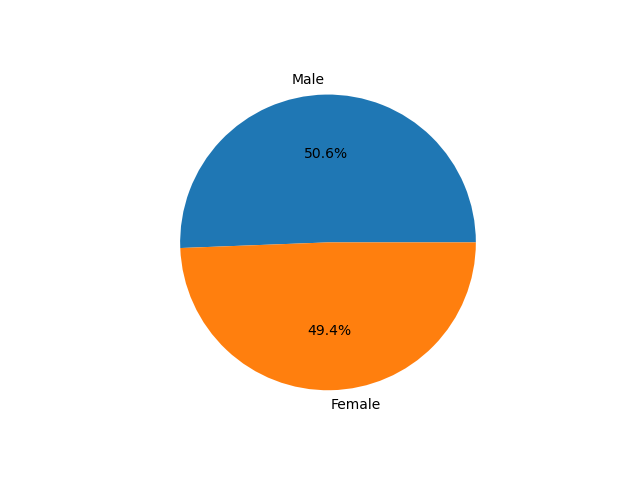

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
%matplotlib notebook
MvsF = Combine.Sex.value_counts()
plt.pie(MvsF.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [91]:
#This code was given to us by instructor


# quartile calculations
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = Combine.loc[Combine["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")    
    

Capomulin's potential outliers: 18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: 9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


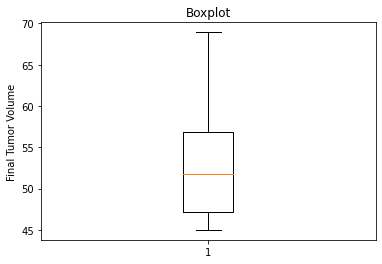

In [128]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(final_tumor_vol)
plt.show()

## Line and Scatter Plots

In [119]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
%matplotlib notebook
%matplotlib inline
Capomulin = Combine.loc[Combine["Drug Regimen"] == "Capomulin",:]
Line = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
Line.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


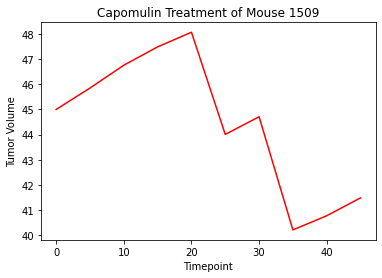

In [129]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Number1 = Line["Timepoint"]
Number2 = Line["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment of Mouse 1509")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.plot(Number1, Number2, color="red")
plt.show()

In [121]:
Capomulin = Combine.loc[Combine["Drug Regimen"] == "Capomulin",:]

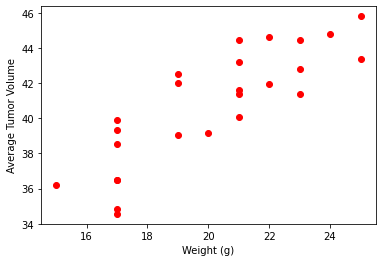

In [130]:
Capomulin_Avg = Capomulin.groupby(['Mouse ID']).mean()
Scatter1 = Capomulin_Avg["Weight (g)"]
Scatter2 = Capomulin_Avg["Tumor Volume (mm3)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.scatter(Scatter1, Scatter2, color="red")
plt.show()

## Correlation and Regression